<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/LAB2/LAB02_ANGEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

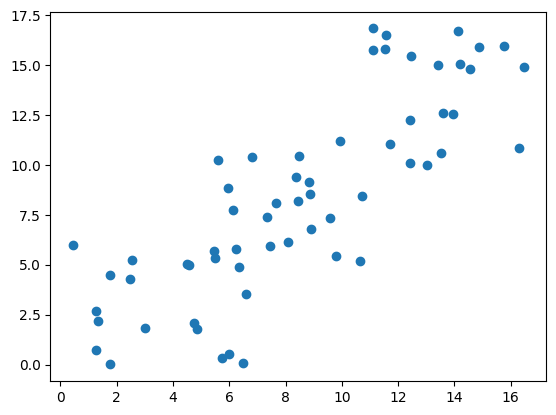

In [ ]:
from re import I
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

loaded_points = np.load('drive/MyDrive/MLF_FILES/k_mean_points.npy')
# print(loaded_points)
plt.scatter(loaded_points[:,0], loaded_points[:,1])
plt.show()

k = 3


In [ ]:

def init_clusters (points: np.array, k_clusters: int):
  row_index = np.random.choice(points.shape[0], size = k_clusters, replace = False)
  initial_clusters = points[row_index, :]

  return initial_clusters


c_n = init_clusters(loaded_points, k)


In [ ]:

def dis_calc (points: np.array, centroids: np.array):
  # My solution:
  # calc = []
  # for i in points:
  #   dx = i[0] - centroids[0]
  #   dy = i[1] - centroids[1]
  #   d_x_y = [dx, dy]
  #   calc.append(d_x_y)

  # Best solution:
  distances_array = np.square(norm(points - centroids, axis = 1))

  return distances_array #return calc


In [ ]:

def dis_4_all_k (points: np.array, centroid_points: np.array):
  # my solution:
  # for i in centroid_points:
  #   dis_calc(loaded_points, c_n[i])
  # dis_array.append(dis_calc)

# Best solution:
  distance_list = []

  for centroid in centroid_points:
    distances = dis_calc(points, centroid)
    distance_list.append(distances)

  dis_array = np.asarray(distance_list)

  # also:
  dis_array = np.asarray([dis_calc(points,centroid) for centroid in centroid_points])

  return dis_array

dist = dis_4_all_k(loaded_points, c_n)
# print(dist)

In [ ]:

def assign_cluster (distance: np.array):
  # a_list = []
  # id = 0
  # for arr in distance:
  #   value1 = [1000]
  #   for value in arr:
  #     id = arr.index(value)
  #     if value < value1[0]:
  #       value1.append(value)
  #       value1.pop(0)
  #     else:
  #       value1.pop(1)


# recommended solution:
  assigned_centroids = np.argmin(distance, axis=0)
  return assigned_centroids

a_clust = assign_cluster(dist)

In [ ]:
print(a_clust)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 2 2 1 2
 1 1 2 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1]


In [ ]:
def calculate_objective(assigned_centroids: np.array, distances: np.array) -> np.array:

  j = np.sum(np.square(assigned_centroids))

  return j



In [ ]:
def new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
  c_points = np.array([])

  for c_class in range(3):
    avg = np.array([])
    for index in range(2):
      avg = np.append(avg, np.array([np.average(points[np.where(assigned_centroids == c_class),index])]))

    c_points = np.append(c_points, avg)



  return np.resize(c_points, (k, 2))

In [ ]:
test = 1
new_c = new_centroids(loaded_points, a_clust, k)
while test == 1:

  dist1 = dis_4_all_k(loaded_points, new_c)

  a_clust1 = assign_cluster(dist1)
  new_c1 = new_centroids(loaded_points, a_clust1, k)

  new_c = np.copy(new_c1)

  new_c =  new_centroids(loaded_points, a_clust1, k)

  if (np.array_equal(new_c, new_c1)) == True:
    break



print(new_c)


[[13.4318396  15.73230278]
 [10.46706168  9.69152268]
 [ 4.72751781  4.04625832]]
[[13.66745571 14.98568409]
 [ 9.47920596  9.00936882]
 [ 4.35659127  3.64902408]]
[[13.66745571 14.98568409]
 [ 9.47920596  9.00936882]
 [ 4.35659127  3.64902408]]
